In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import scipy

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
!pip install scipy

You should consider upgrading via the 'C:\Users\Riyaz\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [9]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.71652395 0.70475924 0.7413146 ]
  [0.70043784 0.68927556 0.7336177 ]
  [0.74997103 0.7421279  0.7931083 ]
  ...
  [0.77524155 0.7565555  0.77977765]
  [0.77420735 0.7545995  0.7781289 ]
  [0.7676424  0.74803454 0.77156395]]

 [[0.7202754  0.7085107  0.7441281 ]
  [0.6924661  0.6808349  0.7242392 ]
  [0.7555981  0.747755   0.7987354 ]
  ...
  [0.72626424 0.7066564  0.7301858 ]
  [0.72156864 0.7019608  0.7254902 ]
  [0.72156864 0.7019608  0.7254902 ]]

 [[0.72187597 0.7104185  0.74448353]
  [0.6928793  0.6811146  0.7235811 ]
  [0.7506826  0.742476   0.79272926]
  ...
  [0.72156864 0.7019608  0.7254902 ]
  [0.72283334 0.7032255  0.7267549 ]
  [0.72846043 0.7088526  0.732382  ]]

 ...

 [[0.5815408  0.561933   0.58938396]
  [0.58060294 0.5609951  0.5884461 ]
  [0.5807557  0.56114787 0.58859885]
  ...
  [0.65846    0.65453845 0.68591106]
  [0.6441692  0.64024764 0.6716202 ]
  [0.541395   0.53716624 0.567617  ]]

 [[0.5837113  0.5641035  0.59155446]
  [0.58418024 0.5645724  0.5920234 ]


In [10]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [11]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [12]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.69686234 0.68509763 0.7282349 ]
  [0.69675016 0.68498546 0.7281227 ]
  [0.696638   0.6848733  0.72801054]
  ...
  [0.55842406 0.5270515  0.57018876]
  [0.5435129  0.51214033 0.5552776 ]
  [0.53686875 0.5054962  0.54863346]]

 [[0.68981016 0.67804545 0.7211827 ]
  [0.69014674 0.67838204 0.7215193 ]
  [0.69048333 0.6787186  0.7218559 ]
  ...
  [0.5581997  0.52682716 0.5699644 ]
  [0.54261535 0.5112428  0.55438006]
  [0.5383273  0.5069547  0.550092  ]]

 [[0.6807917  0.669027   0.7121642 ]
  [0.6810161  0.6692514  0.71238863]
  [0.68124044 0.66947573 0.71261305]
  ...
  [0.5579753  0.52660275 0.56974   ]
  [0.5417178  0.5103452  0.55348253]
  [0.5397858  0.50841326 0.5515505 ]]

 ...

 [[0.7476184  0.7358537  0.76330465]
  [0.7439823  0.7322176  0.7596686 ]
  [0.74369353 0.7319288  0.7593798 ]
  ...
  [0.627159   0.61931586 0.6389237 ]
  [0.6274956  0.61965245 0.6392603 ]
  [0.6278322  0.61998904 0.6395969 ]]

 [[0.74773055 0.73596585 0.7634168 ]
  [0.743758   0.7319933  0.7594443 ]


In [13]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

C:\Users\Riyaz\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape             ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ conv2d (Conv2D)               │ (None, 254, 254, 32)     │       896 │
├───────────────────────────────┼──────────────────────────┼───────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 127, 127, 32)     │         0 │
├───────────────────────────────┼──────────────────────────┼───────────┤
│ conv2d_1 (Conv2D)             │ (None, 125, 125, 64)     │    18,496 │
├───────────────────────────────┼──────────────────────────┼───────────┤
│ max_pooling2d_1               │ (None, 62, 62, 64)       │         0 │
│ (MaxPooling2D)                │                          │           │
├───────────────────────────────┼──────────────────────────┼───────────┤
│ conv2d_2 (Conv2D)             │ (None, 60, 60, 64)       │    36,928 │
├───────────────────────────────┼──────────────────────────┼───────────┤
│ max_pooling2d_2               │ (None, 30, 30, 64)       │         0 │
│ (MaxPooling2D)                │                          │           │
├───────────────────────────────┼──────────────────────────┼───────────┤
│ conv2d_3 (Conv2D)             │ (None, 28, 28, 64)       │    36,928 │
├───────────────────────────────┼──────────────────────────┼───────────┤
│ max_pooling2d_3               │ (None, 14, 14, 64)       │         0 │
│ (MaxPooling2D)                │                          │           │
├───────────────────────────────┼──────────────────────────┼───────────┤
│ conv2d_4 (Conv2D)             │ (None, 12, 12, 64)       │    36,928 │
├───────────────────────────────┼──────────────────────────┼───────────┤
│ max_pooling2d_4               │ (None, 6, 6, 64)         │         0 │
│ (MaxPooling2D)                │                          │           │
├───────────────────────────────┼──────────────────────────┼───────────┤
│ conv2d_5 (Conv2D)             │ (None, 4, 4, 64)         │    36,928 │
├───────────────────────────────┼──────────────────────────┼───────────┤
│ max_pooling2d_5               │ (None, 2, 2, 64)         │         0 │
│ (MaxPooling2D)                │                          │           │
├───────────────────────────────┼──────────────────────────┼───────────┤
│ flatten (Flatten)             │ (None, 256)              │         0 │
├───────────────────────────────┼──────────────────────────┼───────────┤
│ dense (Dense)                 │ (None, 64)               │    16,448 │
├───────────────────────────────┼──────────────────────────┼───────────┤
│ dense_1 (Dense)               │ (None, 3)                │       195 │
└───────────────────────────────┴──────────────────────────┴───────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [16]:
1506/32

47.0625

In [17]:
215/32

6.71875

In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20


C:\Users\Riyaz\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.4272 - loss: 0.9936 - val_accuracy: 0.4792 - val_loss: 0.8967
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 1:05 1s/step - accuracy: 0.3438 - loss: 0.9074

C:\Users\Riyaz\AppData\Local\Programs\Python\Python39\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3438 - loss: 0.4634 - val_accuracy: 0.3478 - val_loss: 0.5046
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.4787 - loss: 0.8944 - val_accuracy: 0.4688 - val_loss: 0.8891
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5312 - loss: 0.4576 - val_accuracy: 0.5217 - val_loss: 0.3815
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.5445 - loss: 0.8463 - val_accuracy: 0.7240 - val_loss: 0.6603
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7500 - loss: 0.3357 - val_accuracy: 0.8261 - val_loss: 0.3441
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.7532 - loss: 0.5700 - val_accuracy: 0.8125 - val_loss: 0.4694
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8125 - loss: 0.2142 - val_accuracy: 0.7391 - val_loss: 0.3182
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.7873 - loss: 0.4920 - val_accuracy: 0.8750 - val_loss: 0.4454
Epo

In [19]:
scores = model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 916ms/step - accuracy: 0.9079 - loss: 0.2093


In [20]:
scores

[0.20598366856575012, 0.9164733290672302]

In [21]:
history

In [22]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [23]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [24]:
type(history.history['loss'])

list

In [25]:
len(history.history['loss'])

20

In [26]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9604367017745972,
 0.45370781421661377,
 0.887476921081543,
 0.4480587840080261,
 0.7924402356147766]

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [28]:
val_acc

[0.4791666567325592,
 0.3478260934352875,
 0.46875,
 0.52173912525177,
 0.7239583134651184,
 0.8260869383811951,
 0.8125,
 0.739130437374115,
 0.875,
 0.782608687877655,
 0.8854166865348816,
 0.95652174949646,
 0.9270833134651184,
 0.95652174949646,
 0.921875,
 0.739130437374115,
 0.8958333134651184,
 0.9130434989929199,
 0.921875,
 0.8260869383811951]

In [29]:
acc

[0.45318859815597534,
 0.34375,
 0.4789687991142273,
 0.53125,
 0.5983718037605286,
 0.75,
 0.7523744702339172,
 0.8125,
 0.8086838722229004,
 0.90625,
 0.8710106611251831,
 1.0,
 0.89552241563797,
 0.96875,
 0.8921302556991577,
 0.96875,
 0.9151967167854309,
 0.9375,
 0.9328358173370361,
 0.96875]

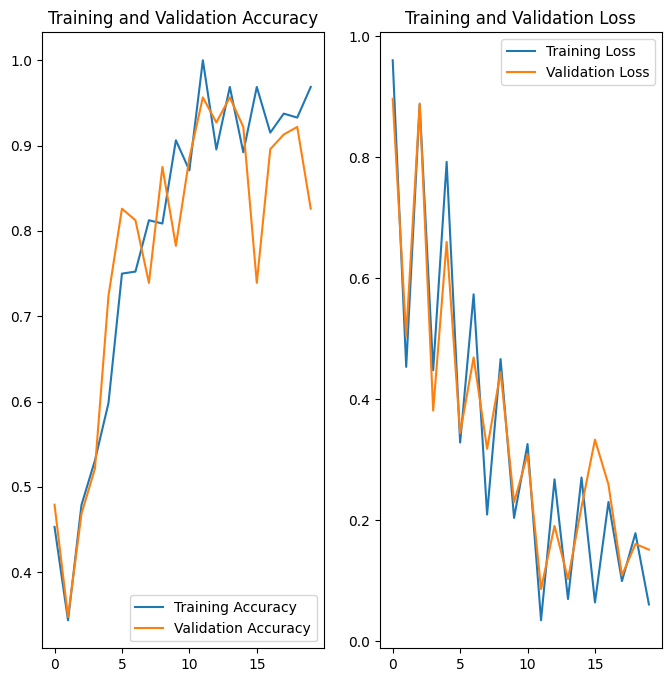

In [30]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
predicted label: Potato___Early_blight


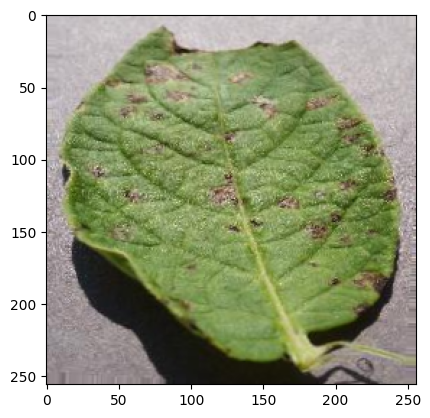

In [33]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


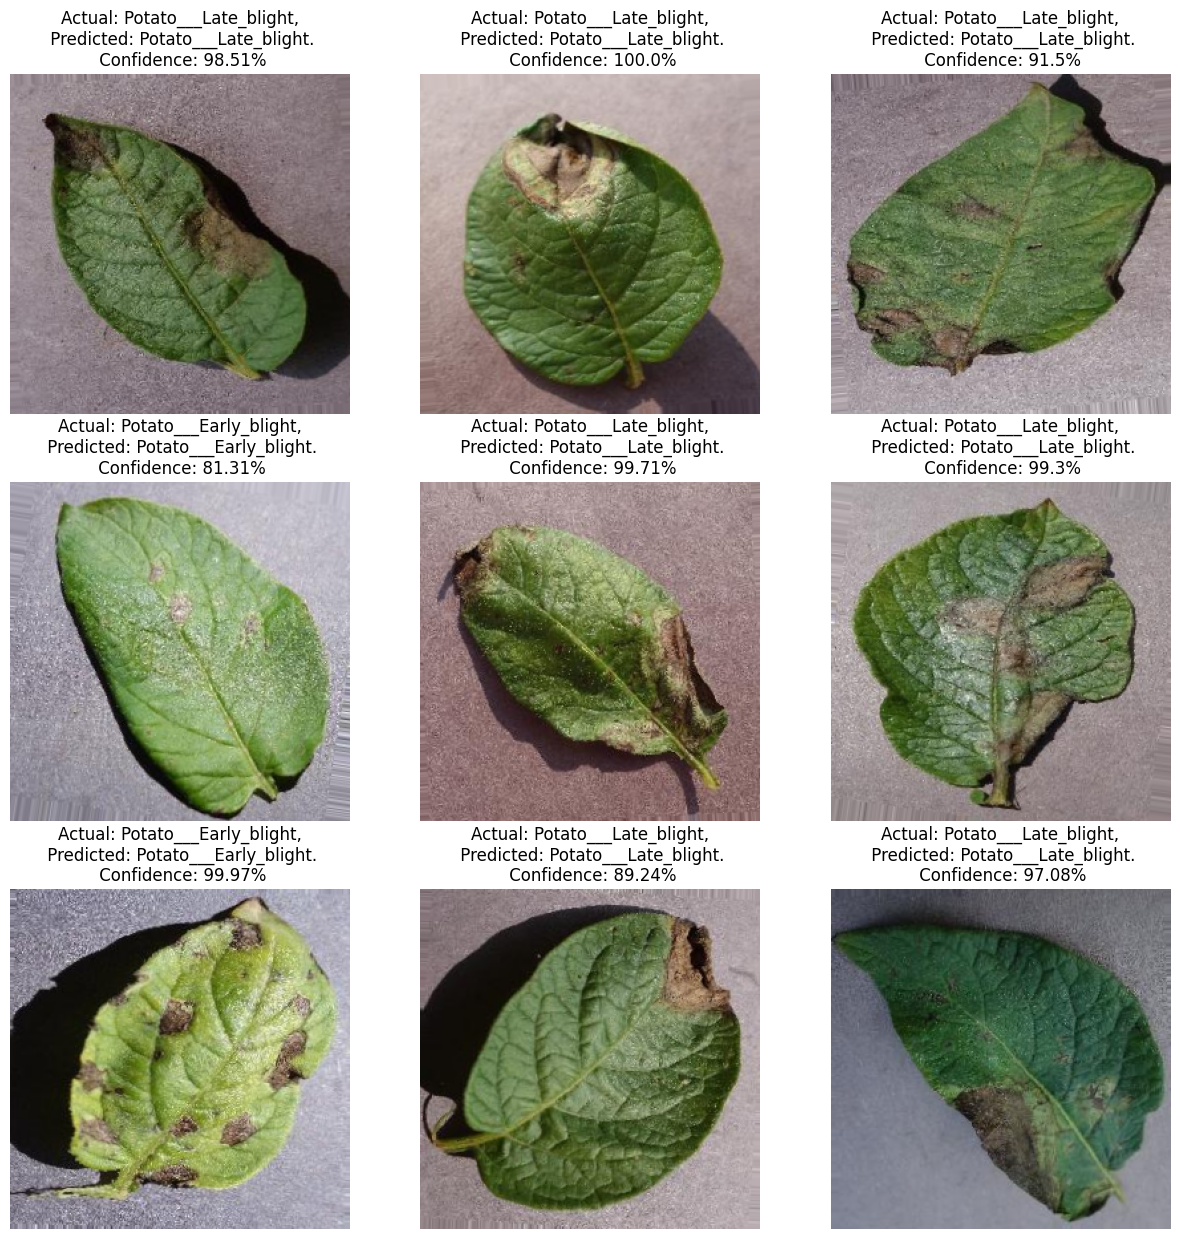

In [35]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [36]:
#model.save("../potatoes.h5")